In [1]:
from pyiron_workflow import Workflow

In [2]:
# Previously - we made our first node - AddOne
@Workflow.wrap.as_function_node()
def AddOne(x):
    y = x + 1
    return y

This allows various things to happen to it... like inserting an array

In [3]:
import numpy as np
random_np_list = np.array([0, 1, 2, 3])

node = AddOne(random_np_list)

In [4]:
node.run()

array([1, 2, 3, 4])

This isn't really desirable if we only want users to use the node for its intended purpose - adding one to an integer. 

This is especially dangerous if we are building expensive workflows, not something trivial. If something doesn't throw an error, you can waste a lot of compute doing something unintended!

To get around this, we can use pyiron_workflow to enforce type-hints on expected datatypes on inputs/outputs, turning workflows *strongly* typed, which makes them rigorous.

To enforce type hints, insert type hints as we would usually do in a function - pyiron_workflow does the rest!

In [5]:
@Workflow.wrap.as_function_node()
def AddOne_TypeHinted(x: int) -> int:
    y = x+1
    return y

In [6]:
# So now we have a function that adds one to a number.
# But - we can't use it like a normal function:
a = 42
b = AddOne_TypeHinted(x=random_np_list)  
b.run()
print(b.outputs.y.values) # A normal function call would return the result
# So we can now see that it complains - 

TypeError: The channel /AddOne_TypeHinted.x cannot take the value `[0 1 2 3]` (<class 'numpy.ndarray'>) because it is not compliant with the type hint <class 'int'>

Of course, we can still give it a list of expected datatypes as inputs, allowing multiple types of data to become an input.

So if we want to re-allow numpy arrays to become an input, or a list, we simply add them like so:

In [7]:
@Workflow.wrap.as_function_node()
def AddOne_TypeHinted2(x: int | np.ndarray | list) -> int | np.ndarray | list:
    y = x+1
    return y

b2 = AddOne_TypeHinted2(x=random_np_list)
b2.run()
print(b2.outputs.y)

b2 = AddOne_TypeHinted2(x=42)
b2.run()
print(b2.outputs.y)


[1 2 3 4]
43


In [8]:
wf = Workflow("AddOne_Multiple")

wf.add_one_1 = AddOne(2)
wf.add_one_2 = AddOne(wf.add_one_1)
wf.add_one_3 = AddOne(wf.add_one_2)

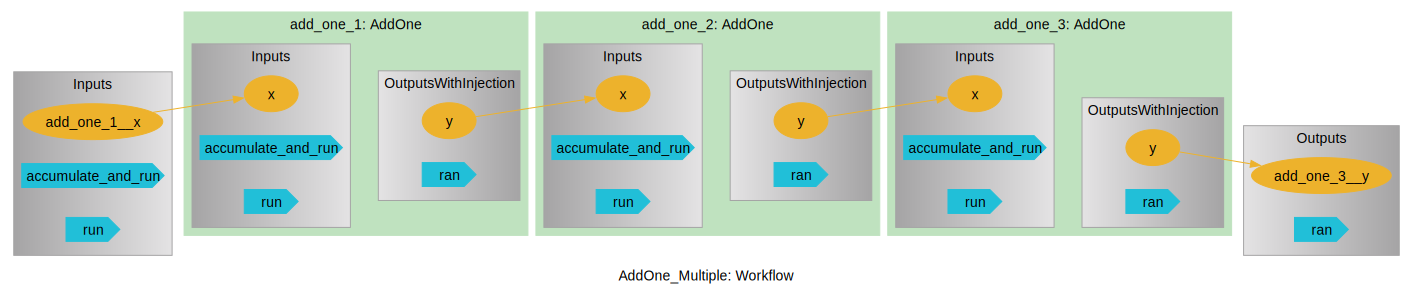

In [9]:
# We can visualise the workflow using the .draw() method
wf.draw()